## Instituto Federal do Sudeste de Minas Gerais, Campus Barbacena
### Projeto Laboratório de Redes de Conhecimento

## Curso de Mineração de Dados Aplicada

Prof. Rafael José de Alencar Almeida
<rafael.alencar@ifsudestemg.edu.br>

<br>

## Aula 6:  Machine Learning: aprendizado de máquina supervisionado
<br>
<img src="./img/ml.png?v=2">
<br>
- Nesta aula aprenderemos a treinar e avaliar modelos de aprendizado de máquina supervisionado
- No aprendizado de máquina supervisionado, o modelo aprende por meio de exemplos
- Os modelos podem ser treinados para **classificação** (classe discreta indepente) ou **regressão** (valor contínuo)
<br>
<img src="./img/classif_regr.png">
**Fonte da figura:** https://medium.freecodecamp.org

<br>
- Um modelo recebe um conjunto de entradas X e o conjunto de saídas (respostas) y, e tenta modelar uma função matemática que mapeie X -> y.

<img src="./img/model.jpg">

<br>
- A ideia é que o modelo **generalize** as principais características de cada entrada que levam a determinada saída, de modo a prever corretamente novas entradas que não foram vistas no treinamento.

<img src="./img/overfit.png">
**Fonte da figura:** https://towardsdatascience.com

In [1]:
# Imports básicos

import numpy as np
import pandas as pd

## Conceitos básicos de classificação e regressão
Para estes exemplos práticos, utilizaremos o dataset Iris.

<img src="./img/iris.png">

<strong>Fonte da figura:</strong> https://rpubs.com/wjholst/322258

In [2]:
# Carrega o dataset a partir do scikit
from sklearn import datasets

iris = datasets.load_iris()


# Transforma o dataset em um DataFrame Pandas
df_iris = pd.DataFrame(iris.data)
df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_iris['target'] = iris.target

df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Prepara os dados para o treinamento e previsão
X = df_iris.drop(['target'], axis=1)
y = df_iris['target']

### Classificação com árvore de decisão

- Rápido para treinar e prever
- Não-linear
- Não necessita escalar os dados
- Uma única árvore costuma ter baixa taxa de acerto

<img src="https://image.slidesharecdn.com/nextgentalk022015-150211154330-conversion-gate02/95/an-introduction-to-supervised-machine-learning-and-pattern-classification-the-big-picture-24-638.jpg?cb=1423785060">

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    
    # Hiperparâmetros: devem ser ajustados para cada dataset/problema, 
    # manualmente (intuição) ou por técnicas automatizadas.
    # Ver: https://scikit-learn.org/stable/modules/grid_search.html
    
    max_depth=4,
    criterion='entropy',
    random_state=1
)

# Treina o modelo
model.fit(
    X, y
)

# Prevê os próprios dados do treinamento (não usar isso no mundo real)
print('.predict(X):\n')
print(model.predict(X))

# Prevê a probabilidade de cada entrada em relação a cada classe com os 
# próprios dados do treinamento (não usar isso no mundo real)
print('\n\n.predict_proba(X):')
model.predict_proba(X)

.predict(X):

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


.predict_proba(X):


array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.

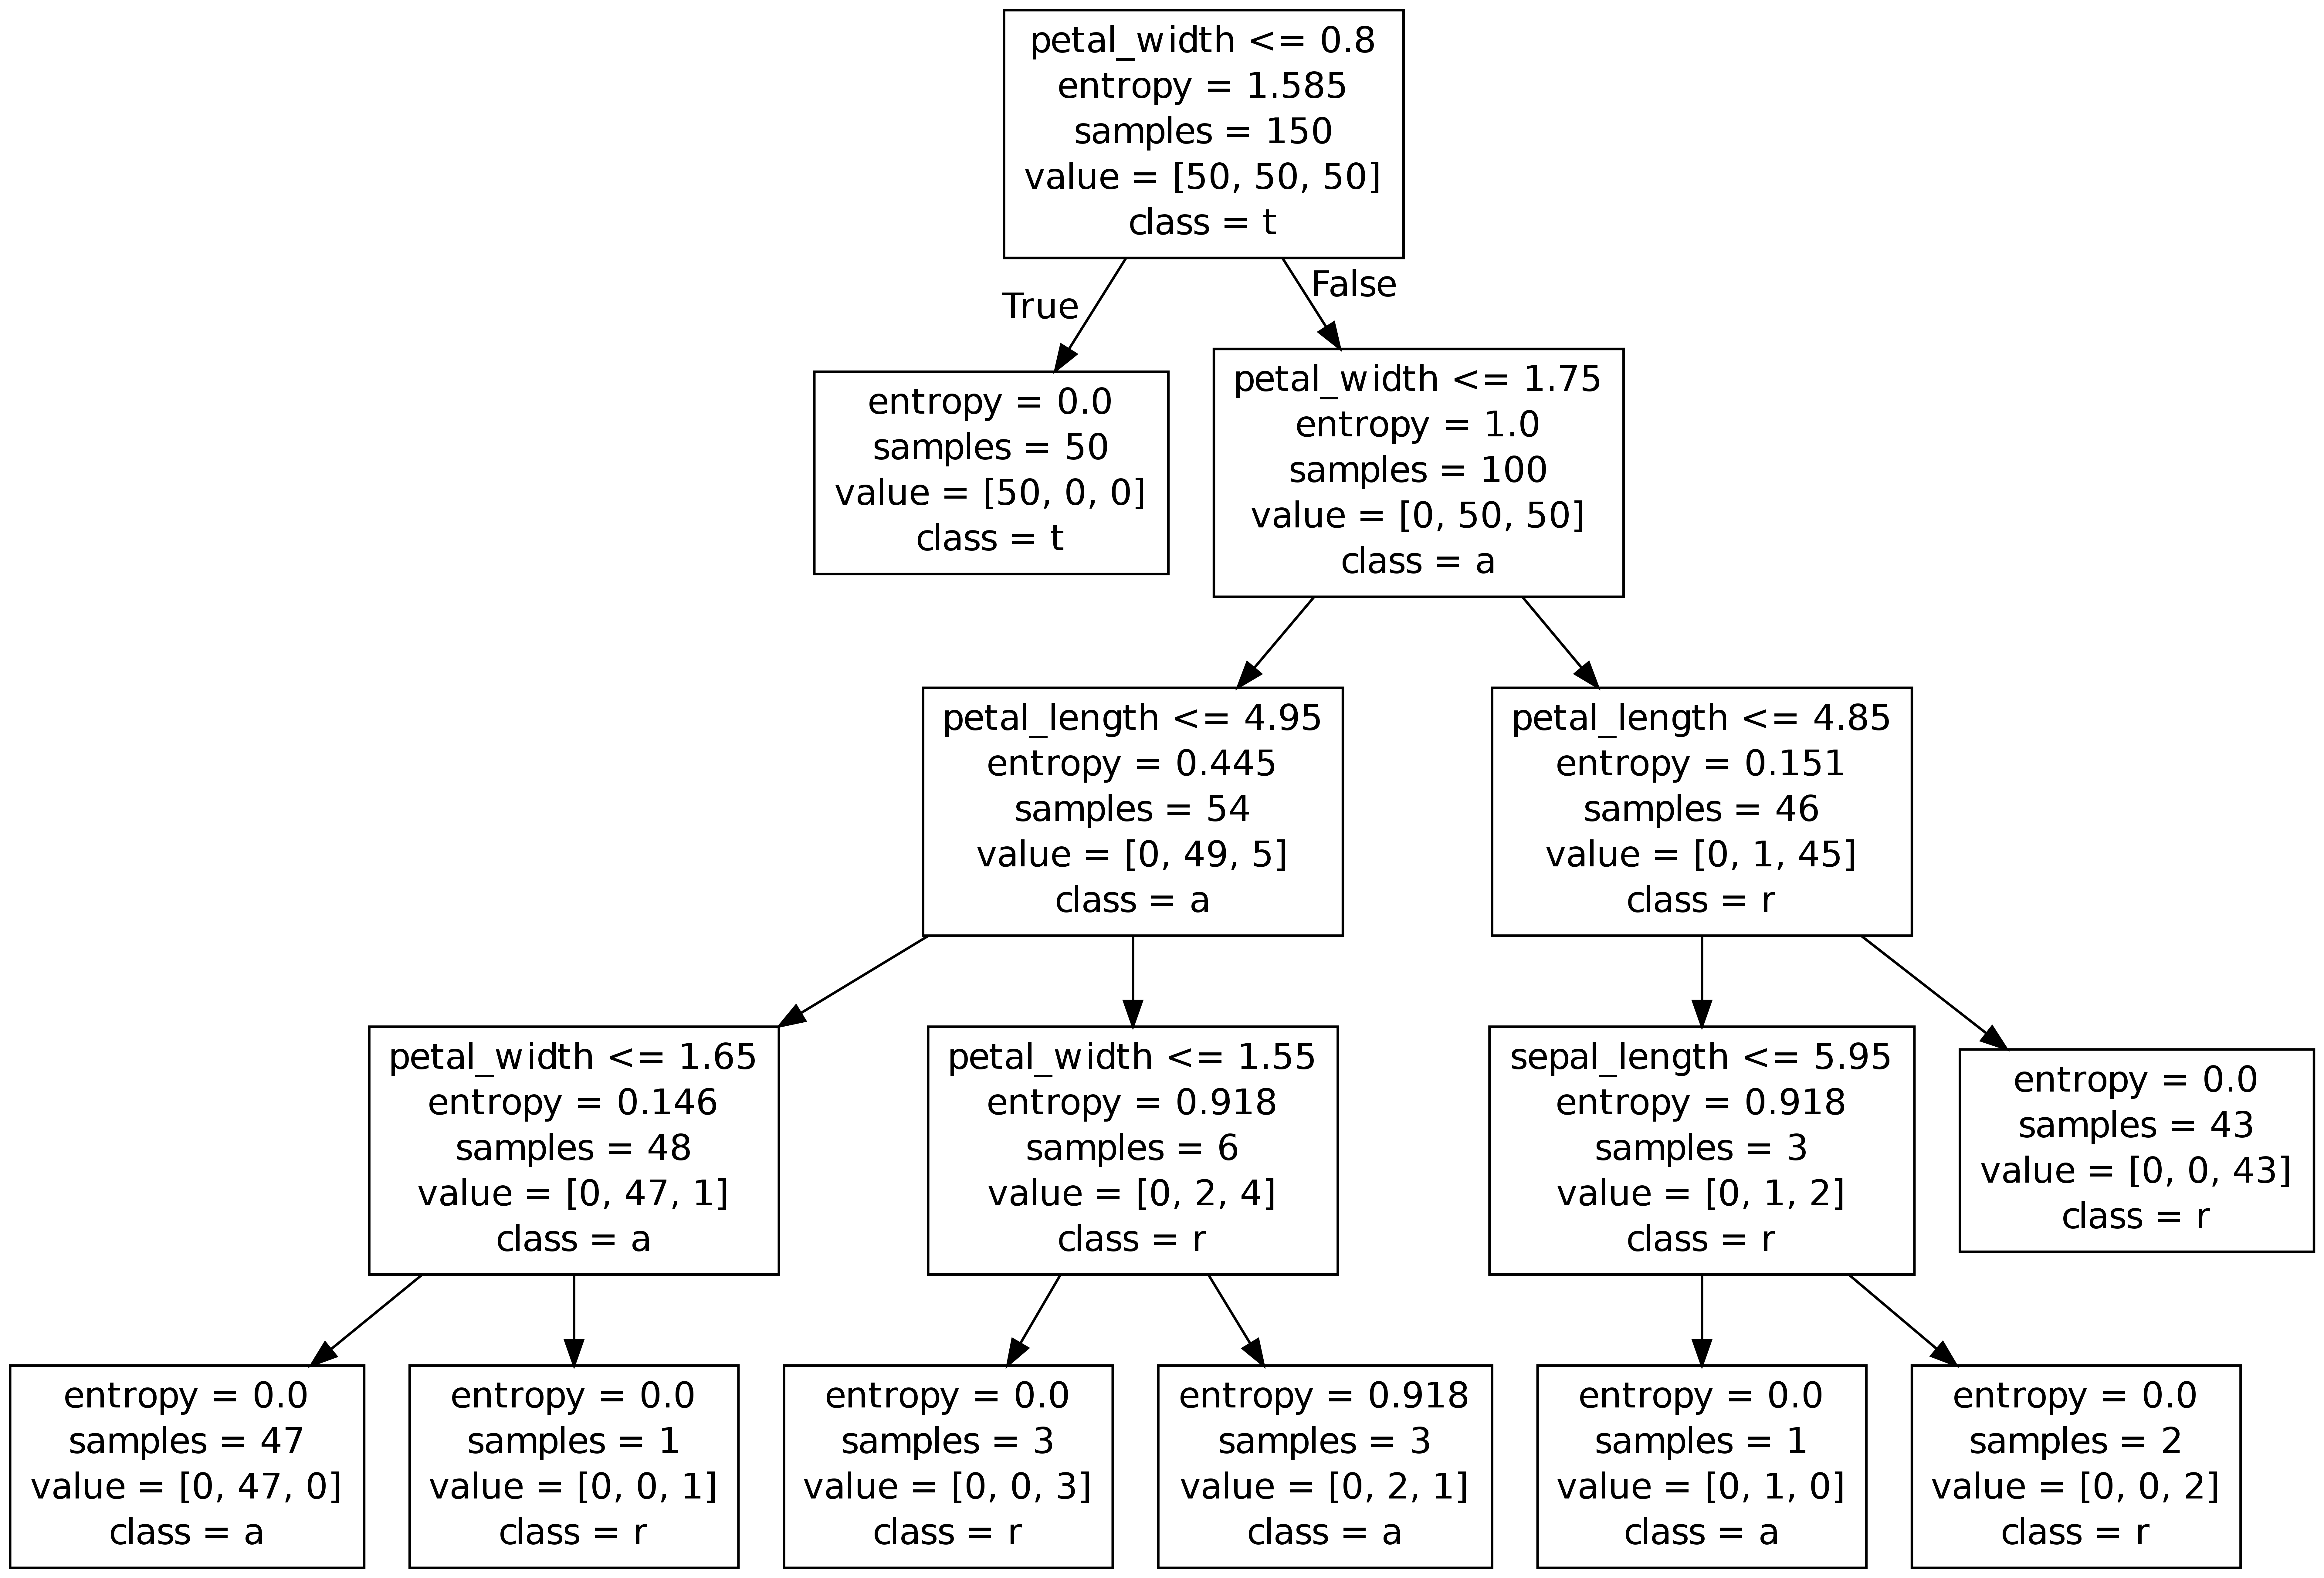

In [5]:
# Visualiza a árvore gerada
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

export_graphviz(
    model, 
    out_file='./img/tree.dot', 
    feature_names=X.columns,
    class_names='target'
)

call(['dot', '-Tpng', './img/tree.dot', '-o', './img/tree.png', '-Gdpi=600'])
Image(filename='./img/tree.png')

<br>
### Regressão com árvore de decisão

- Vamos usar as colunas <em>sepal_length, sepal_width e petal_width</em> para prever o tamanho de **petal_length**.

In [6]:
X_regressao = df_iris.drop(['target', 'petal_length'], axis=1)
y_regressao = df_iris['petal_length']

In [7]:
from sklearn.tree import DecisionTreeRegressor

model_regressao = DecisionTreeRegressor(
    max_depth=4,
    criterion='mse', # mean squared error
    random_state=1
)

# Treina o modelo
model_regressao.fit(
    X_regressao, y_regressao
)

# Prevê os próprios dados do treinamento (não usar isso no mundo real)
print('.predict(X):\n')
print(model_regressao.predict(X_regressao))

.predict(X):

[1.48387097 1.48387097 1.48387097 1.37142857 1.48387097 1.58888889
 1.37142857 1.48387097 1.37142857 1.48387097 1.48387097 1.48387097
 1.48387097 1.1        1.2        1.58888889 1.58888889 1.48387097
 1.48387097 1.48387097 1.48387097 1.58888889 1.         1.58888889
 1.48387097 1.48387097 1.58888889 1.48387097 1.48387097 1.48387097
 1.48387097 1.58888889 1.48387097 1.48387097 1.48387097 1.48387097
 1.48387097 1.48387097 1.37142857 1.48387097 1.48387097 1.37142857
 1.37142857 1.58888889 1.58888889 1.48387097 1.48387097 1.37142857
 1.48387097 1.48387097 4.74375    4.74375    4.74375    4.06190476
 4.74375    4.06190476 5.05217391 3.275      4.32857143 4.06190476
 3.275      4.06190476 4.32857143 4.74375    4.06190476 4.74375
 4.06190476 4.06190476 4.74375    4.06190476 5.05217391 4.32857143
 4.74375    4.32857143 4.32857143 4.74375    4.74375    5.05217391
 4.74375    4.06190476 4.06190476 4.06190476 4.06190476 5.05217391
 4.06190476 5.05217391 4.74375    4.32857143 4.0619

In [8]:
# Plota a árvore
export_graphviz(
    model_regressao, 
    out_file='./img/tree.dot', 
    feature_names=X_regressao.columns,
    class_names='petal_length'
)

call(['dot', '-Tpng', './img/tree.dot', '-o', './img/tree.png', '-Gdpi=600'])
Image(filename='./img/tree.png')

<br>
### Validação do modelo com a técnica train/test

- Os dados devem ser separados em **treino** e **teste**
- O modelo é treinado apenas com os dados de treino, e prevê para os dados de teste
- A previsão é comparada com as respostas esperadas e calculada a taxa de acerto por meio de alguma **métrica**

<img src="./img/train_test.png">
**Fonte da figura:** https://www.developer.com/mgmt/real-world-machine-learning-model-evaluation-and-optimization.html

<br>
- Métricas de classificação: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics
- Métricas de regressão: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
- Escolha da métrica: https://scikit-learn.org/stable/modules/model_evaluation.html

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=1
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X_train.head()

(100, 4) (100,)
(50, 4) (50,)


,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
36,5.5,3.5,1.3,0.2
117,7.7,3.8,6.7,2.2
139,6.9,3.1,5.4,2.1
107,7.3,2.9,6.3,1.8


In [11]:
# Treina o modelo com X_train e prevê para X_test
model = DecisionTreeClassifier(
    max_depth=4,
    criterion='entropy',
    random_state=1
)

model.fit(
    X_train, y_train
)

y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

In [12]:
# Avalia com a métrica de acurácia (não funciona bem para targets desbalanceados)
metrics.accuracy_score(
    y_test, # Valor esperado
    y_pred # Valor previsto
)

0.96

In [13]:
# Avalia com a métrica f1-score (normaliza a quantidade de erros e acertos)
metrics.f1_score(
    y_test, 
    y_pred, 
    average=None # Para múltiplas classes
)

array([1.        , 0.94736842, 0.92857143])

### Matriz de confusão

- Permite visualizar as previsões corretas e incorretas para cada classe. 
- Quanto maiores os valores da diagonal, mais corretas as previsões.

In [14]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matriz de confusão:\n', conf_mat)

labels = iris.target_names.tolist()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Matriz de confusão:
 [[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]


<Figure size 640x480 with 2 Axes>

### Validação K-fold

- Dividir os dados em treino e teste aleatoriamente traz o risco de amostras importantes ficarem no teste e não ser possível analisar como o modelo se sairia com elas.
- Este problema ocorre principalmente em datasets pequenos e/ou desbalanceados.
- A técnica K-fold consiste em se dividir os dados para treinamento em K partes (folds), fazendo um treinamento e validação para cada, e combinando o valor das validações.
- No caso de targets desbalanceados, o ideal é segmentar os folds de forma **estratificada**: manter o mesmo número de cada classe entre os folds.
- Exemplo com K=5:

<img src="https://static.oschina.net/uploads/img/201609/26155106_OfXx.png">
**Fonte da figura:** https://my.oschina.net/Bettyty/blog/751627

In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model,
    X,
    y, 
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

print('Score de cada fold', scores)
print('Acurácia média:', np.mean(scores))
print('Desvio padrão:', np.std(scores))

Score de cada fold [0.98039216 0.92156863 0.97916667]
Acurácia média: 0.960375816993464
Desvio padrão: 0.027445387307583054


## Visão geral de alguns modelos

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png">
Fonte da imagem: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

### Random forest

<img src="./img/random_forest.png">
**Fonte da figura:** https://www.researchgate.net/publication/301638643_Electromyographic_Patterns_during_Golf_Swing_Activation_Sequence_Profiling_and_Prediction_of_Shot_Effectiveness

In [16]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = RandomForestClassifier(
    max_depth=4,
    n_estimators=25,
    n_jobs=-1,
    random_state=1
)

model.fit(
    X_train, y_train
)

model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

## Redes neurais

**Perceptron:** neurônio artificial:
<img src="http://ataspinar.com/wp-content/uploads/2016/11/perceptron_schematic_overview.png">
Fonte da figura: http://ataspinar.com/2016/12/22/the-perceptron/

<br>

**Multi Layer Perceptron (MLP):**
<img src="https://www.researchgate.net/profile/Mohamed_Zahran6/publication/303875065/figure/fig4/AS:371118507610123@1465492955561/A-hypothetical-example-of-Multilayer-Perceptron-Network.png">
<br>


In [17]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import *

# Os modelos que não são baseados em árvores geralmente
# necessitam que os dados sejam escalados
std = StandardScaler()
std.fit(X_train)

X_train = std.transform(X_train)
X_test = std.transform(X_test)


model = MLPClassifier(
    hidden_layer_sizes=(50, 15),
    activation='tanh',    
    max_iter=500,
    random_state=1
)

model.fit(
    X_train, y_train
)

model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1, 2, 0, 0, 0, 1])

## Máquina de vetor de suporte (SVM)

**Linear SVM:**

<img src="https://aitrends.com/wp-content/uploads/2018/01/1-19SVM-2.jpg">
Fonte da imagem: https://aitrends.com/ai-insider/support-vector-machines-svm-ai-self-driving-cars/

<br>

**Kernel trick:**

<img src="https://blog-c7ff.kxcdn.com/blog/wp-content/uploads/2017/02/kernel.png">
Fonte da imagem: https://www.hackerearth.com/blog/machine-learning/simple-tutorial-svm-parameter-tuning-python-r/

<br>

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_0012.png">
Fonte da imagem: https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [18]:
from sklearn.svm import SVC, SVR

model = SVC(
    kernel='rbf',
    C=1.0, # Parâmetro de penalidade de erro
    random_state=1
)

model.fit(
    X_train, y_train
)

model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

## K vizinhos mais próximos (KNN)

<img src="https://mertricks.files.wordpress.com/2016/04/knn.png?w=331&h=290">
Fonte da imagem: https://mertricks.com/2016/04/24/from-least-squares-to-knn-statistical-models-supervised-learning-and-function-approximation/

In [19]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

model = KNeighborsClassifier(
    n_neighbors=3,
    n_jobs=-1
)

model.fit(
    X_train, y_train
)

model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

## XGBoost

<img src="https://s3.ap-south-1.amazonaws.com/techleer/395a.png">

In [21]:
from xgboost import XGBClassifier, XGBRegressor

model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    n_jobs=-1,
    random_state=1
)

model.fit(
    X_train, y_train
)

model.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1])

<br>
## Participando de uma competição Kaggle

Santander Customer Satisfaction<br>
https://www.kaggle.com/c/santander-customer-satisfaction

<em>In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.</em>

<br>

**Submissão e avaliação:**
<img src="./img/eval_santander.png">

<br>

**Métrica de avaliação ROC AUC:**
<img src="https://slideplayer.com/slide/5293728/17/images/16/AUC+for+ROC+curves+AUC+%3D+100%25+AUC+%3D+50%25+AUC+%3D+90%25+AUC+%3D+65%25.jpg">
Fonte da figura: https://slideplayer.com/slide/5293728/

<br>

**Placar da competição:**
<img src="./img/kaggle_lb.png">

In [22]:
train = pd.read_csv('./santander/train.csv')
test = pd.read_csv('./santander/test.csv')

train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [24]:
# Nome das features
labels = train.columns.drop(['ID', 'TARGET']).tolist()

In [25]:
# Modelo
m = XGBClassifier(
    n_jobs=4,
    random_state=1
)

In [26]:
# Validação local
np.mean(
    cross_val_score(
        m,
        train[labels],
        train['TARGET'],
        cv=3,
        scoring='roc_auc'
    )
)

0.8366788341191711

In [27]:
# Gerando a previsão para o arquivo de teste
m.fit(
    train[labels],
    train['TARGET']
)

pred = m.predict_proba(test[labels])[:,1]

In [28]:
df_submission = pd.read_csv('./santander/sample_submission.csv')
df_submission['TARGET'] = pred
df_submission.to_csv('submission.csv', index=False)

df_submission.head()

,ID,TARGET
0,2,0.056389
1,5,0.057872
2,6,0.002247
3,7,0.012715
4,9,0.002755


<br>
## Atividade para casa

Treine e valide um modelo de classificação que receba como entrada o texto de uma notícia, e responda como saída a probabilidade [0, 1] da notícia ser sobre esporte.